In [2]:
import os
os.makedirs("src", exist_ok=True)


In [3]:
%%writefile src/data_ingestion.py
import pandas as pd

def load_data(file_path: str) -> pd.DataFrame:
    """
    Loads the dataset from a given CSV file path.

    Args:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded dataset as a pandas DataFrame.
    """
    try:
        df = pd.read_csv("Crop_recommendation.csv")
        print(f" Data loaded successfully. Shape: {df.shape}")
        return df
    except Exception as e:
        print(f" Error loading data: {e}")
        return None


Writing src/data_ingestion.py


In [4]:
%%writefile src/data_preprocessing.py
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans and preprocesses the dataset.

    Steps:
        - Handles missing values (if any)
        - Encodes categorical columns (e.g., 'label')

    Args:
        df (pd.DataFrame): Input dataset.

    Returns:
        pd.DataFrame: Preprocessed dataset.
    """
    # Drop duplicates if any
    df = df.drop_duplicates()

    # Fill missing values if they exist
    df = df.fillna(df.median(numeric_only=True))

    # Encode 'label' column
    if 'label' in df.columns:
        le = LabelEncoder()
        df['label'] = le.fit_transform(df['label'])

    print(" Data preprocessing completed.")
    return df


Writing src/data_preprocessing.py


In [5]:
%%writefile src/feature_engineering.py
import pandas as pd

def split_features_and_target(df: pd.DataFrame):
    """
    Splits dataset into input features (X) and target variable (y).

    Args:
        df (pd.DataFrame): Preprocessed dataset.

    Returns:
        tuple: X (features), y (target)
    """
    X = df.drop(columns=['label'])
    y = df['label']

    print(" Feature and target split completed.")
    return X, y


Writing src/feature_engineering.py


In [6]:
%%writefile src/model_engineering.py
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def train_model(X, y):
    """
    Trains a Random Forest Classifier on the dataset.

    Args:
        X (pd.DataFrame): Input features.
        y (pd.Series): Target variable.

    Returns:
        model (RandomForestClassifier): Trained model.
        X_test, y_test: Test data for evaluation.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = RandomForestClassifier(
        n_estimators=100, random_state=42
    )

    model.fit(X_train, y_train)
    print(" Model training completed.")

    return model, X_test, y_test


Writing src/model_engineering.py


In [7]:
%%writefile src/model_evaluation.py
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test):
    """
    Evaluates the trained model on test data.

    Args:
        model: Trained RandomForest model.
        X_test: Test features.
        y_test: Test labels.

    Returns:
        dict: Evaluation metrics.
    """
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(" Model evaluation completed.")
    print(f"Accuracy: {acc:.4f}\n")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    return {"accuracy": acc}


Writing src/model_evaluation.py


In [8]:
import sys
sys.path.append("src")

from data_ingestion import load_data
from data_preprocessing import preprocess_data
from feature_engineering import split_features_and_target
from model_engineering import train_model
from model_evaluation import evaluate_model

# Run the pipeline
df = load_data("Crop_recommendation.csv")
processed_df = preprocess_data(df)
X, y = split_features_and_target(processed_df)
model, X_test, y_test = train_model(X, y)
evaluate_model(model, X_test, y_test)


 Data loaded successfully. Shape: (2200, 8)
 Data preprocessing completed.
 Feature and target split completed.
 Model training completed.
 Model evaluation completed.
Accuracy: 0.9932

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96

{'accuracy': 0.9931818181818182}

In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, X, y, cv=5)
print("5-fold CV accuracy:", np.mean(scores))


5-fold CV accuracy: 0.9945454545454545


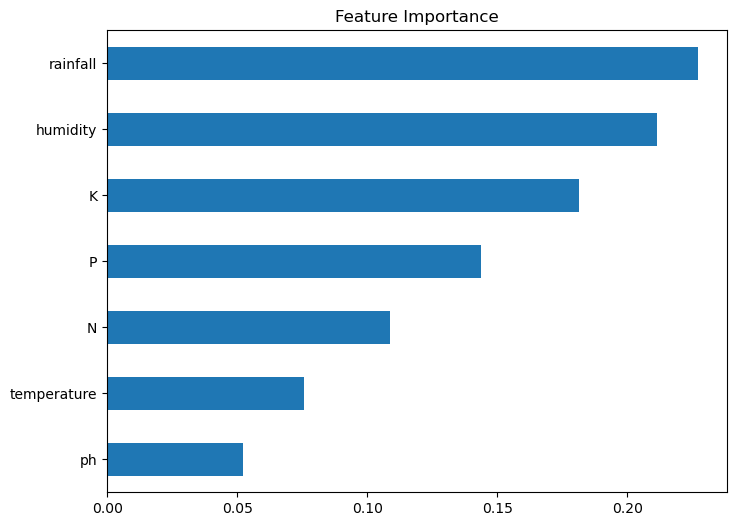

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(8,6), title="Feature Importance")
plt.show()
